# 1. Imports

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()


Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()


,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)


In [6]:
df_airline.isnull().sum()


Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()


<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])


In [9]:
df_airline.info()


<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()


,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)


In [12]:
df_airline.head()


,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

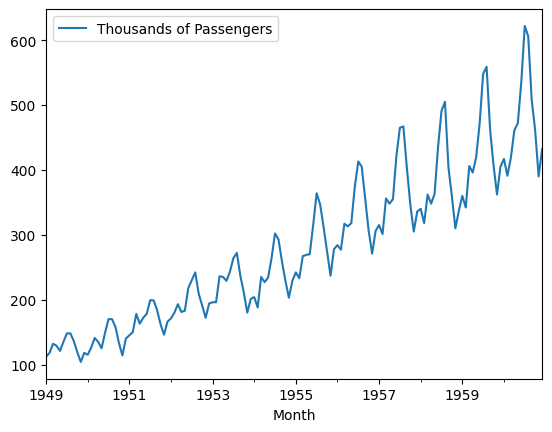

In [13]:
df_airline.plot()


In [14]:
from statsmodels.tsa.stattools import adfuller


In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <=0.05:
        print("Strong Evidence against the null hypothesis, reject the null hypothesis.Data has no unit root and is stationary")
        
    else:
        print("Weak Evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [16]:
adf_test(df_airline['Thousands of Passengers'])


ADF Statistics: 0.8153688792060463
p- value: 0.991880243437641
Weak Evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [ ]:
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()


,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())


ADF Statistics: -2.8292668241699923
p- value: 0.054213290283826474
Weak Evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [21]:
## Use Techniques Differencing

df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)


In [22]:
adf_test(df_airline['Passengers Second Difference'].dropna())


ADF Statistics: -16.384231542468516
p- value: 2.7328918500141235e-29
Strong Evidence against the null hypothesis, reject the null hypothesis.Data has no unit root and is stationary


In [23]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [24]:
adf_test(df_airline['Passengers 12 Difference'].dropna())


ADF Statistics: -3.383020726492481
p- value: 0.011551493085514954
Strong Evidence against the null hypothesis, reject the null hypothesis.Data has no unit root and is stationary


In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


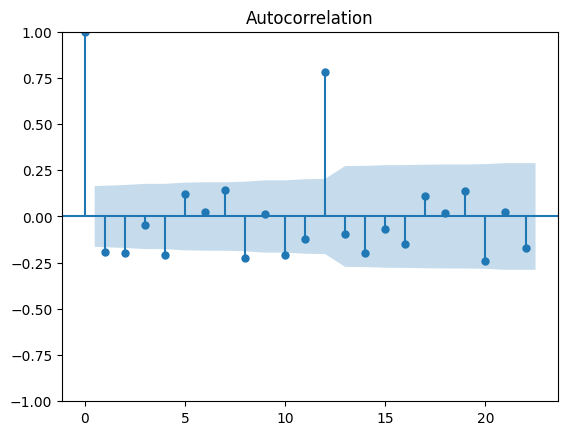

In [26]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())


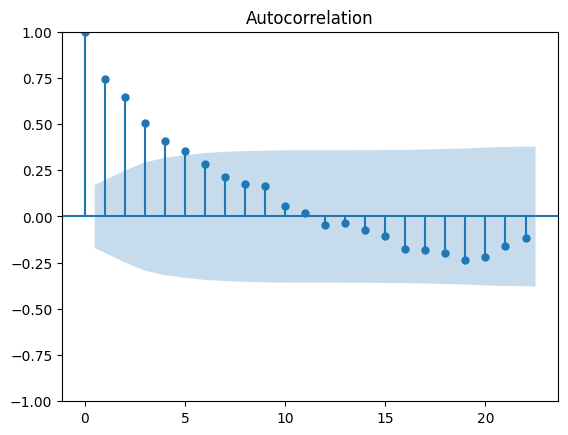

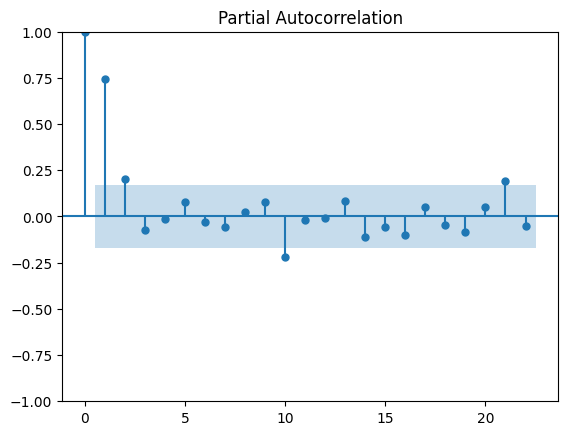

In [27]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

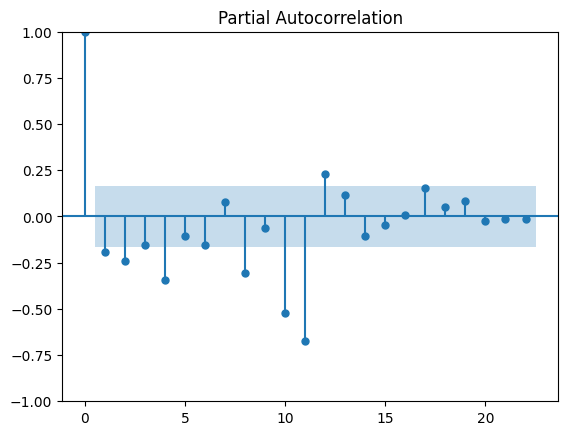

In [28]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())


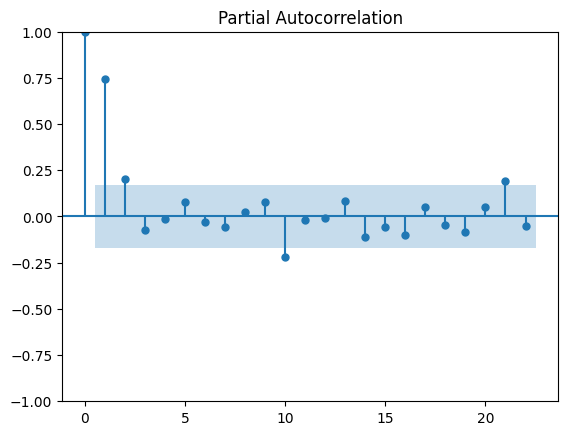

In [29]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())


In [30]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [31]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [32]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
test_data


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [38]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [36]:
train_data.head()


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [39]:
import statsmodels.api as sm


In [40]:
sm.tsa.arima.ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [65]:
model_ARIMA=sm.tsa.arima.ARIMA(train_data['Thousands of Passengers'],order=(14,2,12))


C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
model_Arima_fit=model_ARIMA.fit()


C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
model_Arima_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(14, 2, 12)   Log Likelihood                -306.049
Date:                     Sun, 23 Mar 2025   AIC                            666.097
Time:                             03:33:18   BIC                            731.079
Sample:                         01-01-1949   HQIC                           692.186
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7417      5.594     -0.133      0.895     -11.706      10.223
ar.L2         -0.2026      9.057     -0.022      0.982     -17.955      17.550
ar.L3         -0.2550      9.079     -0.028      0.978     -18.049      17.539
ar.L4         -0.2469      8.991     -0.027      0.978     -17.868      17.375
ar.L5         -0.2915      8.865     -0.033      0.974     -17.666      17.083
ar.L6         -0.1971      8.973     -0.022      0.982     -17.785      17.390
ar.L7         -0.2634      8.560     -0.031      0.975     -17.040      16.513
ar.L8         -0.3339      8.566     -0.039      0.969     -17.123      16.455
ar.L9         -0.2617      8.988     -0.029      0.977     -17.879      17.355
ar.L10        -0.2968      8.953     -0.033      0.974     -17.843      17.250
ar.L11        -0.1215      9.090     -0.013      0.989     -17.938      17.695
ar.L12         0.5780      8.275      0.070      0.944     -15.640      16.796
ar.L13         0.5039      3.781      0.133      0.894      -6.906       7.914
ar.L14        -0.0673      0.489     -0.138      0.890      -1.025       0.891
ma.L1         -0.4302      5.623     -0.076      0.939     -11.452      10.591
ma.L2         -0.5973      2.739     -0.218      0.827      -5.966       4.771
ma.L3         -0.0807      1.332     -0.061      0.952      -2.692       2.530
ma.L4          0.1334      1.995      0.067      0.947      -3.777       4.044
ma.L5          0.2006      1.062      0.189      0.850      -1.881       2.282
ma.L6         -0.2717      0.559     -0.486      0.627      -1.368       0.824
ma.L7          0.2250      1.147      0.196      0.844      -2.023       2.473
ma.L8         -0.2830      0.539     -0.525      0.600      -1.340       0.774
ma.L9          0.2500      1.410      0.177      0.859      -2.514       3.014
ma.L10        -0.1053      0.709     -0.148      0.882      -1.495       1.285
ma.L11        -0.3111      0.748     -0.416      0.678      -1.778       1.155
ma.L12         0.2992      1.868      0.160      0.873      -3.361       3.960
sigma2        73.4714     28.075      2.617      0.009      18.446     128.497
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.46
Prob(Q):                              0.80   Prob(JB):                         0.18
Heteroskedasticity (H):               2.14   Skew:                             0.50
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:

##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [69]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [70]:
pred


1956-01-01    283.903329
1956-02-01    280.436205
1956-03-01    291.167113
1956-04-01    303.333277
1956-05-01    301.679246
1956-06-01    344.715320
1956-07-01    394.055670
1956-08-01    369.477566
1956-09-01    343.815192
1956-10-01    304.880951
1956-11-01    272.431560
1956-12-01    303.270736
1957-01-01    318.155706
1957-02-01    305.090950
1957-03-01    317.781486
1957-04-01    326.543166
1957-05-01    332.015720
1957-06-01    376.187962
1957-07-01    419.293862
1957-08-01    398.046189
1957-09-01    369.274834
1957-10-01    335.477845
1957-11-01    306.897568
1957-12-01    332.376670
1958-01-01    348.731001
1958-02-01    333.490006
1958-03-01    341.920319
1958-04-01    352.891916
1958-05-01    361.378136
1958-06-01    407.444603
1958-07-01    445.151254
1958-08-01    425.831266
1958-09-01    395.705829
1958-10-01    365.881066
1958-11-01    340.984103
1958-12-01    362.552403
1959-01-01    378.218361
1959-02-01    362.081317
1959-03-01    366.490254
1959-04-01    379.384996


In [71]:
residuals

Month
1956-01-01      0.096671
1956-02-01     -3.436205
1956-03-01     25.832887
1956-04-01      9.666723
1956-05-01     16.320754
1956-06-01     29.284680
1956-07-01     18.944330
1956-08-01     35.522434
1956-09-01     11.184808
1956-10-01      1.119049
1956-11-01     -1.431560
1956-12-01      2.729264
1957-01-01     -3.155706
1957-02-01     -4.090950
1957-03-01     38.218514
1957-04-01     21.456834
1957-05-01     22.984280
1957-06-01     45.812038
1957-07-01     45.706138
1957-08-01     68.953811
1957-09-01     34.725166
1957-10-01     11.522155
1957-11-01     -1.897568
1957-12-01      3.623330
1958-01-01     -8.731001
1958-02-01    -15.490006
1958-03-01     20.079681
1958-04-01     -4.891916
1958-05-01      1.621864
1958-06-01     27.555397
1958-07-01     45.848746
1958-08-01     79.168734
1958-09-01      8.294171
1958-10-01     -6.881066
1958-11-01    -30.984103
1958-12-01    -25.552403
1959-01-01    -18.218361
1959-02-01    -20.081317
1959-03-01     39.509746
1959-04-01     16.6

<Axes: ylabel='Density'>

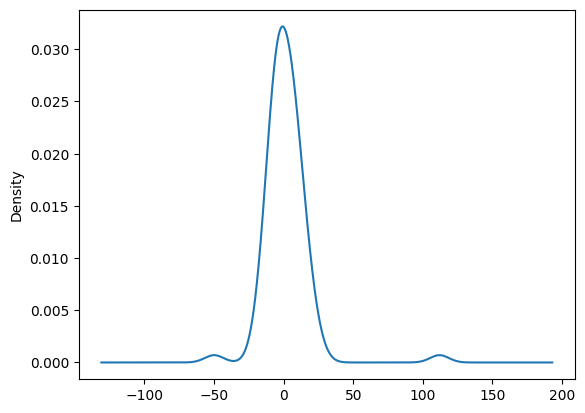

In [72]:
model_Arima_fit.resid.plot(kind='kde')


In [73]:
test_data['Predicted_ARIMA']=pred


C:\Users\fasee\AppData\Local\Temp\ipykernel_25904\301507245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

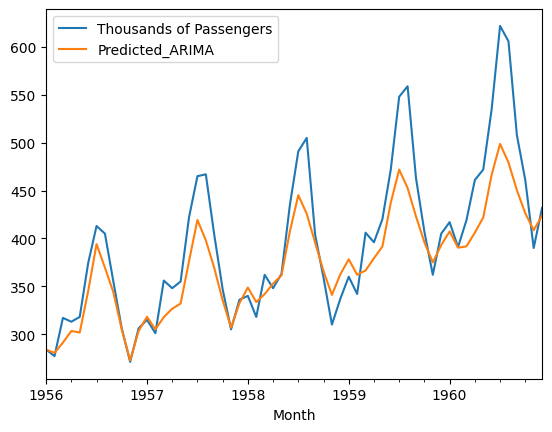

In [74]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()


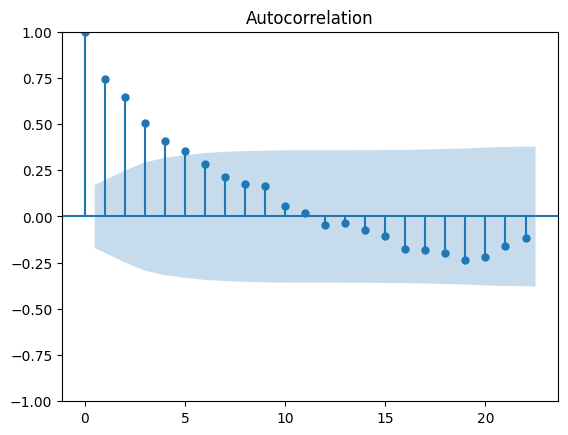

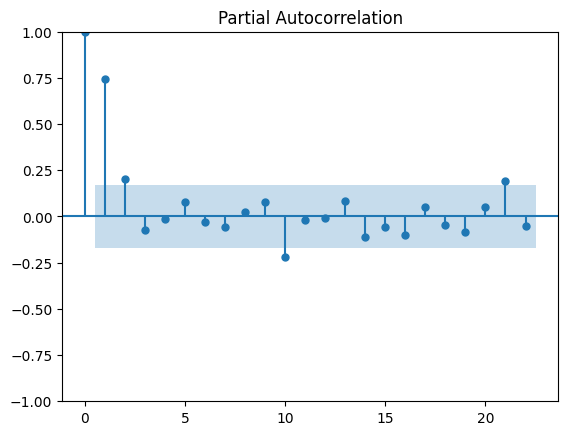

In [75]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [53]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [54]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))


C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
model_SARIMA_fit=model_SARIMA.fit()


C:\Users\fasee\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
model_SARIMA_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sun, 23 Mar 2025   AIC                            548.479
Time:                                     02:46:43   BIC                            568.969
Sample:                                 01-01-1949   HQIC                           556.636
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5920      0.949      0.624      0.533      -1.268       2.452
ar.L2          0.8320      0.231      3.594      0.000       0.378       1.286
ar.L3         -0.4470      0.904     -0.495      0.621      -2.218       1.324
ma.L1          0.1903      1.195      0.159      0.874      -2.152       2.533
ma.L2         -0.5298      1.291     -0.411      0.681      -3.059       2.000
ma.L3         -0.1004      0.393     -0.255      0.798      -0.871       0.670
ma.L4         -0.1287      0.350     -0.368      0.713      -0.815       0.558
ma.L5          0.2454      0.366      0.671      0.502      -0.472       0.963
sigma2        87.7553     84.582      1.038      0.299     -78.023     253.533
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.04   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
test_data.tail()


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,2574.0
1960-09-01,508.0,-98.0,-82.0,45.0,2615.0
1960-10-01,461.0,-47.0,51.0,54.0,2656.0
1960-11-01,390.0,-71.0,-24.0,28.0,2697.0
1960-12-01,432.0,42.0,113.0,27.0,2738.0


In [58]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [59]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

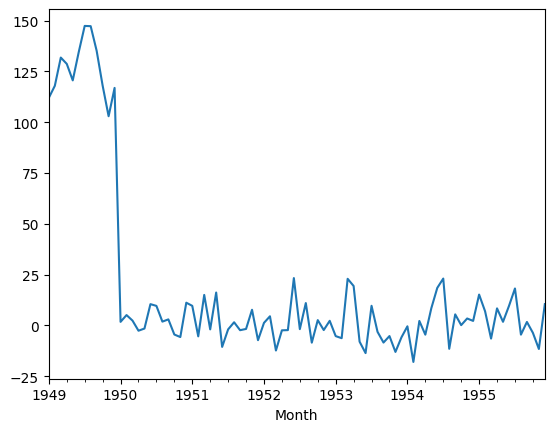

In [60]:
model_SARIMA_fit.resid.plot()


<Axes: ylabel='Density'>

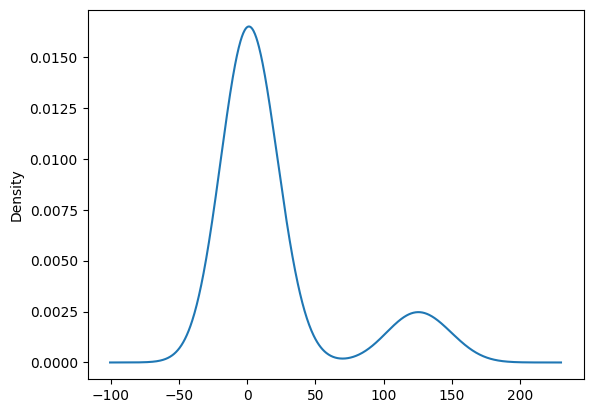

In [61]:
model_SARIMA_fit.resid.plot(kind='kde')


In [62]:
test_data['Predicted_SARIMA']=pred_Sarima


C:\Users\fasee\AppData\Local\Temp\ipykernel_25904\2609187862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [63]:
test_data


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,360.0,NaN
1956-03-01,317.0,40.0,47.0,50.0,401.0,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,442.0,NaN
1956-05-01,318.0,5.0,9.0,48.0,483.0,NaN
1956-06-01,374.0,56.0,51.0,59.0,524.0,NaN
1956-07-01,413.0,39.0,-17.0,49.0,565.0,403.474432
1956-08-01,405.0,-8.0,-47.0,58.0,606.0,385.158576
1956-09-01,355.0,-50.0,-42.0,43.0,647.0,349.544816


<Axes: xlabel='Month'>

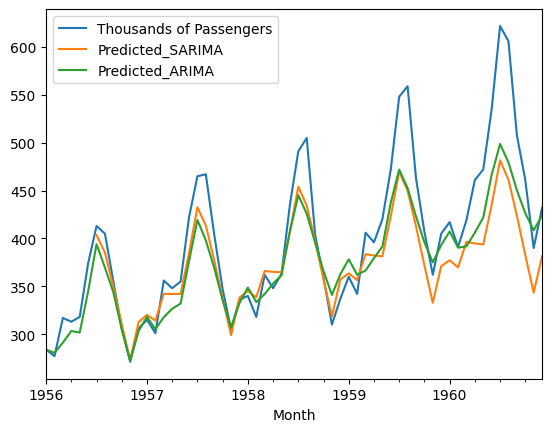

In [76]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()
